# INTRODUCTION


<img src="https://img.evbuc.com/https%3A%2F%2Fcdn.evbuc.com%2Fimages%2F24945955%2F175508455052%2F2%2Foriginal.jpg?w=200&auto=format%2Ccompress&q=75&sharp=10&s=a4894a26eb70fdd64e08589de6b38c1f">

The client, WeCloudData,  the leading data science education and career service provider in Canada. The client has collected many alumni and student profiles from Linkedin. This project is aimed to classify the main groups (clusters) of students/alumni from the corresponding Linkedin profiles, which is critical to the school’s business developments. 

# IMPORT LIBRARIES


In [1]:

!pip install kmodes
import numpy as np # linear algebra
import pandas as pd
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
np.random.seed(42)


# LOAD DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



The Linkedin profile data have been stored in different locations. The followings collect and join the infos to one dataset.

In [ ]:
# the ERD is not given due to business concerns
companies = pd.read_csv('companies.csv')
company_description = pd.read_csv('company_description.csv')
language = pd.read_csv('language.csv')
language_profiles = pd.read_csv('language_profiles.csv')
skills = pd.read_csv('skills.csv')
skills_profiles = pd.read_csv('skills_profiles.csv')
schools = pd.read_csv('schools.csv')
schools_profiles = pd.read_csv('schools_profiles.csv')
major = pd.read_csv('major.csv')
major_profiles = pd.read_csv('major_profiles.csv')
certification = pd.read_csv('certification.csv')
certification_profiles = pd.read_csv('certification_profiles.csv')
linkedin_users = pd.read_csv('linkedin_users.csv')
user_detail = pd.read_csv('user_detail.csv')

profile = pd.read_csv('profile_dev.csv')

In [ ]:
## Join different table to form the clustering data
data = profile[['profile_ID','user_ID','company_ID','country']].merge(skills_profiles).merge(skills).fillna('Unknown').drop(columns=['skills_profiles_ID','skill_ID'])\
                                                        .merge(major_profiles).merge(major).fillna('Unknown').drop(columns=['major_profiles_ID','major_ID'])\
                                                        .merge(certification_profiles).merge(certification).fillna('Unknown').drop(columns=['certification_profiles_ID','certification_ID'])\
                                                        .merge(companies).fillna('Unknown').drop(columns=['company_ID','website','user_ID','company_name','website'])
data = data[data['industry']!='Unknown'].set_index('profile_ID')
data.to_csv('cluster_data.csv')


In [3]:
data = pd.read_csv('/content/drive/My Drive/partnership/cluster_data.csv')

# DATA EXPLORATION

In [14]:
data.head()

,Cluster,country,teaching,skill_name,language_name,major_name,industry,job type
profile_ID,,,,,,,,
25064,2,India,False,python,English,Data Science,Information Technology & Services,Manager
25064,2,India,False,tableau,English,Data Science,Information Technology & Services,Manager
25064,2,India,False,sql,English,Data Science,Information Technology & Services,Manager
25064,2,India,False,python,English,General,Information Technology & Services,Manager
25064,2,India,False,tableau,English,General,Information Technology & Services,Manager


In [5]:
data = data.set_index('profile_ID').drop_duplicates()
## certification_name is overlap with skill
data = data.drop(columns='certification_name')
data.head()

,title,city,country,teaching,skill_name,language_name,major_name,industry
profile_ID,,,,,,,,
25064,Analytics Manager,Bangalore Urban,India,False,python,English,Data Science,Information Technology & Services
25064,Analytics Manager,Bangalore Urban,India,False,tableau,English,Data Science,Information Technology & Services
25064,Analytics Manager,Bangalore Urban,India,False,sql,English,Data Science,Information Technology & Services
25064,Analytics Manager,Bangalore Urban,India,False,python,English,General,Information Technology & Services
25064,Analytics Manager,Bangalore Urban,India,False,tableau,English,General,Information Technology & Services


In [ ]:
import re
# Put all Lead related titles into the Lead category
d0 = data['title'].mask((data['title'].str.contains('Lead|Specialist',case=False,regex=True)),'Specialist')
# Put all management related titles into the Manager category
d1 = d0.mask(d0.str.contains('Manager|CEO|Director|President|Chair|PM|Chief|VP',case=False,regex=True),'Manager')
# Put all data science related titles into the Data Scientist category
d2 = d1.mask((d1.str.contains('Data Scientist',case=False)),'Data Scientist')
d3 = d2.mask((d2.str.contains('Data Science',case=False)),'Data Scientist')
# Put all Data Engineer related titles into the Data Engineer category
d4 = d3.mask((d3.str.contains('Data Engineer',case=False)),'Data Engineer')
# Put all Human Resource related titles into the Human Resource category
d5 = d4.mask((d4.str.contains('HR')) | (d4.str.contains('Human Resource',case=False)),'Human Resource')
# Put all Machine Learning related titles into the Machine Learning category
d6 = d5.mask((d5.str.contains('Machine Learning',case=False)),'Machine Learning')
# Put all Data Analyst related titles into the Data Analyst category
d7 = d6.mask((d6.str.contains('Data Analyst',case=False)),'Data Analyst')
# Put all Software Engineer related titles into the Software Engineer category
d8 = d7.mask((d7.str.contains('Software',case=False))| (d7.str.contains('Digital',case=False)),'Software')
# Put all  Engineer related titles into the non Data Engineer category
d9 = d8.mask(d8.str.contains('[^D][^a][^t][^a] Engineer',case=False,regex=True),'non-Data Engineer')
# Put all  Data Achitect titles into the Data Architect category
d10 = d9.mask((d9.str.contains('Architect',case=False)),'Data Architect')
# Put all  Analyst titles into the non-Data Analyst category
d11 = d10.mask((d10.str.contains('[^D][^a][^t][^a] Analyst',case=False,regex=True)),'non-Data Analyst')
# Put all  Data Consultant titles into the Data Consultant category
d12 = d11.mask((d11.str.contains('Data Consultant',case=False)),'Data Consultant')
# Put all  non-Data Consultant titles into the non-Data Consultant category
d13 = d12.mask((d12.str.contains('[^D][^a][^t][^a] Consultant',case=False,regex=True)),'non-Data Consultant')
# Put all  Advisor titles into the Advisor Consultant category
d14 = d13.mask((d13.str.contains('Advisor',case=False)),'Advisor')
# Put all  Developer titles into the Developer category
d15 = d14.mask((d14.str.contains('Developer',case=False)),'Developer')
# Put all  Sales titles into the Sales category
d16 = d15.mask((d15.str.contains('Sale',case=False)),'Sales')
# Put all  Media titles into the Media category
d17 = d16.mask((d16.str.contains('Media',case=False))|(d16.str.contains('Reporter')),'Media')
# Put all  Administrator titles into the Administrator category
d18 = d17.mask((d17.str.contains('Administrator',case=False)),'Administrator')
# Put all  Associate titles into the Administrator category
d19 = d18.mask((d18.str.contains('Associate',case=False)),'Associate')
# Put all  Consultant titles into the Consultant category
d20 = d19.mask((d19.str.contains('Research|Researcher',case=False,regex=True)),'Researcher')
d21 = d20.where((d20.str.contains('Specialist|Researcher|Machine Learning|Manager|Data Engineer|Data Scientist|Human Resource|Associate|Administrator|Media|Sales|Developer|Advisor|non-Data Consultant|Data Consultant|non-Data Analyst|Data Architect|non-Data Engineer|Software|Data Analyst',case=False,regex=True)),'Others')
d21.value_counts()

In [8]:
data['job type'] = d21
data = data.drop(columns='title')

In [ ]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)
## most features are categorical so use KModes for clustering

Categorical variables in the dataset: ['title', 'city', 'country', 'skill_name', 'language_name', 'major_name', 'certification_name', 'industry']


# CLUSTERING

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 280955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 280955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 280955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 280955.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 280955.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5855, cost: 265413.0
Run 1, iteration: 2/100, moves: 7912, cost: 263209.0
Run 1, iteration: 3/100, moves: 1337, cost: 263209.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, it

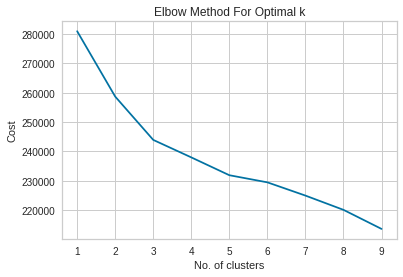

In [10]:
# Elbow curve to find optimal number of clusters
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=-1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
#The elbow plot shows that the ideal number of clusters is 6, set n_clusters as 6
kmode = KModes(n_clusters=6, init = "random", n_init = 6, verbose=2)
clusters = kmode.fit_predict(data)
data.insert(0, "Cluster", clusters, True)
data

In [ ]:
# summarize the major clusters
count = data['Cluster'].value_counts()
centroids = kmode.cluster_centroids_
cluster_label = pd.DataFrame(centroids,columns = ['country','teaching','skill','language','major','industry','job type'])
cluster_label['number_records'] = count
cluster_label
## the output is not shown due to business concerns